# Problem Statement

The dataset provides information on household income and population statistics across various counties in the United States, categorized by urban and rural areas. The goal is to analyze and compare income distributions, population trends, and urban-rural differences to identify potential disparities and patterns.

# Column Description

County – Name of the county.

State – Name of the state to which the county belongs.
    
FIPS – Unique Federal Information Processing Standards code assigned to the county.
    
State FIPS Code – FIPS code specific to the state.
    
County FIPS Code – FIPS code specific to the county within the state.
    
Total Population – Total number of people living in the county.

Median Household Income – The median income of households within the county.
    
Urban-Rural – Classification of the county as either "Urban" or "Rural."


In [135]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [75]:
df=pd.read_csv("D:\Data_Set\Income_Urban_VS_Rural.csv",encoding='unicode_escape')
df

,County,State,FIPS,State FIPS Code,County FIPS Code,Total Population,Median Household Income,Urban-Rural
0,Autauga County,Alabama,1001,1,1,59285,69841,Urban
1,Baldwin County,Alabama,1003,1,3,239945,75019,Urban
2,Barbour County,Alabama,1005,1,5,24757,44290,Rural
3,Bibb County,Alabama,1007,1,7,22152,51215,Rural
4,Blount County,Alabama,1009,1,9,59292,61096,Urban
...,...,...,...,...,...,...,...,...
3217,Vega Baja Municipio,Puerto Rico,72145,72,145,54058,23877,Urban
3218,Vieques Municipio,Puerto Rico,72147,72,147,8147,17531,Rural
3219,Villalba Municipio,Puerto Rico,72149,72,149,21778,24882,Rural
3220,Yabucoa Municipio,Puerto Rico,72151,72,151,29868,21279,Urban


In [76]:
df.shape

(3222, 8)

In [77]:
df.columns

Index(['County', 'State', 'FIPS', 'State FIPS Code', 'County FIPS Code',
       'Total Population', 'Median Household Income', 'Urban-Rural'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   County                   3222 non-null   object
 1   State                    3222 non-null   object
 2   FIPS                     3222 non-null   int64 
 3   State FIPS Code          3222 non-null   int64 
 4   County FIPS Code         3222 non-null   int64 
 5   Total Population         3222 non-null   int64 
 6   Median Household Income  3222 non-null   int64 
 7   Urban-Rural              3222 non-null   object
dtypes: int64(5), object(3)
memory usage: 201.5+ KB


In [79]:
df.describe()

,FIPS,State FIPS Code,County FIPS Code,Total Population,Median Household Income
count,3222.000000,3222.000000,3222.000000,3.222000e+03,3.222000e+03
mean,31377.890441,31.274674,103.216325,1.041721e+05,-3.488154e+05
std,16299.548258,16.285065,106.560811,3.296689e+05,1.660872e+07
min,1001.000000,1.000000,1.000000,4.300000e+01,-6.666667e+08
25%,19029.500000,19.000000,35.000000,1.098550e+04,5.410725e+04
50%,30022.000000,30.000000,79.000000,2.596700e+04,6.314950e+04
75%,46104.500000,46.000000,133.000000,6.752625e+04,7.319900e+04
max,72153.000000,72.000000,840.000000,9.848406e+06,1.787070e+05


In [80]:
df.head()

,County,State,FIPS,State FIPS Code,County FIPS Code,Total Population,Median Household Income,Urban-Rural
0,Autauga County,Alabama,1001,1,1,59285,69841,Urban
1,Baldwin County,Alabama,1003,1,3,239945,75019,Urban
2,Barbour County,Alabama,1005,1,5,24757,44290,Rural
3,Bibb County,Alabama,1007,1,7,22152,51215,Rural
4,Blount County,Alabama,1009,1,9,59292,61096,Urban


In [81]:
df.tail()

,County,State,FIPS,State FIPS Code,County FIPS Code,Total Population,Median Household Income,Urban-Rural
3217,Vega Baja Municipio,Puerto Rico,72145,72,145,54058,23877,Urban
3218,Vieques Municipio,Puerto Rico,72147,72,147,8147,17531,Rural
3219,Villalba Municipio,Puerto Rico,72149,72,149,21778,24882,Rural
3220,Yabucoa Municipio,Puerto Rico,72151,72,151,29868,21279,Urban
3221,Yauco Municipio,Puerto Rico,72153,72,153,33509,21918,Urban


In [82]:
df.isna().sum()

County                     0
State                      0
FIPS                       0
State FIPS Code            0
County FIPS Code           0
Total Population           0
Median Household Income    0
Urban-Rural                0
dtype: int64

In [126]:
total_unique_countries = df['County'].nunique()
print("Total unique countries:", total_unique_countries)

total_unique_states = df['State'].nunique()
print("Total unique state:", total_unique_states)

Total unique countries: 1960
Total unique state: 52


In [84]:
country_counts = df['County'].value_counts()
print(country_counts)

County
Washington County        30
Jefferson County         25
Franklin County          24
Jackson County           23
Lincoln County           23
                         ..
Lares Municipio           1
Las MarÃ­as Municipio     1
Las Piedras Municipio     1
LoÃ­za Municipio          1
Accomack County           1
Name: count, Length: 1960, dtype: int64


In [128]:
total_countries = df['County'].count()
print("Total country entries:", total_countries)

total_states = df['State'].count()
print("Total states entries:", total_states)

Total country entries: 3222
Total states entries: 3222


In [131]:
unique_countries_list = df['County'].unique()
print("Unique countries:", unique_countries_list)

unique_States_list = df['State'].unique()
print("Unique States:", unique_States_list)

Unique countries: ['Autauga County' 'Baldwin County' 'Barbour County' ...
 'Villalba Municipio' 'Yabucoa Municipio' 'Yauco Municipio']
Unique States: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Puerto Rico']


In [132]:
top_10_countries = df['County'].value_counts().head(10)
print(top_10_countries)


top_10_states = df['State'].value_counts().head(10)
print(top_10_states)

County
Washington County    30
Jefferson County     25
Franklin County      24
Jackson County       23
Lincoln County       23
Madison County       19
Montgomery County    18
Clay County          18
Marion County        17
Union County         17
Name: count, dtype: int64
State
Texas             254
Georgia           159
Virginia          133
Kentucky          120
Missouri          115
Kansas            105
Illinois          102
North Carolina    100
Iowa               99
Tennessee          95
Name: count, dtype: int64


# Exploratory Data Analysis (EDA)

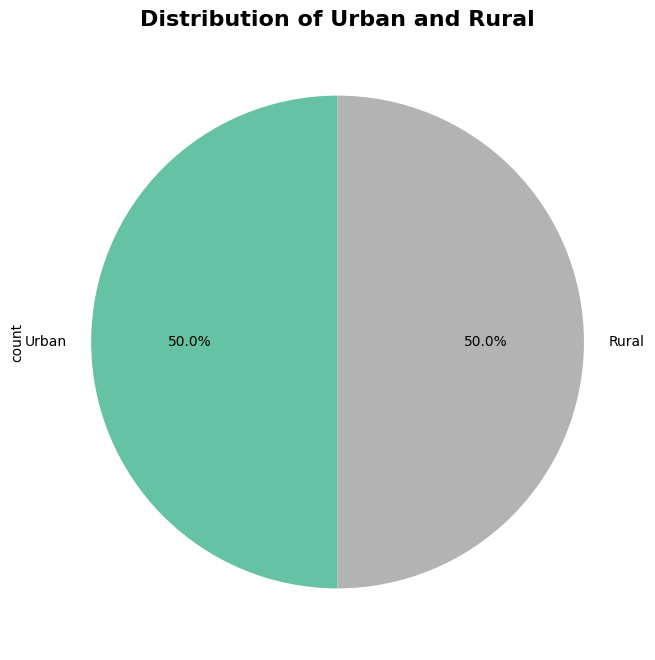

In [219]:
Urban_rural_counts = df['Urban-Rural'].value_counts()

# Create the pie chart
plt.figure(figsize=(12, 8))
Urban_rural_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set2', legend=False)
plt.title("Distribution of Urban and Rural", fontsize=16, fontweight='bold')
plt.show()

Observation :-

The pie chart shows the distribution of urban and rural areas in the dataset. It's cleary see that urban and rural distribution is 50-50 percentage

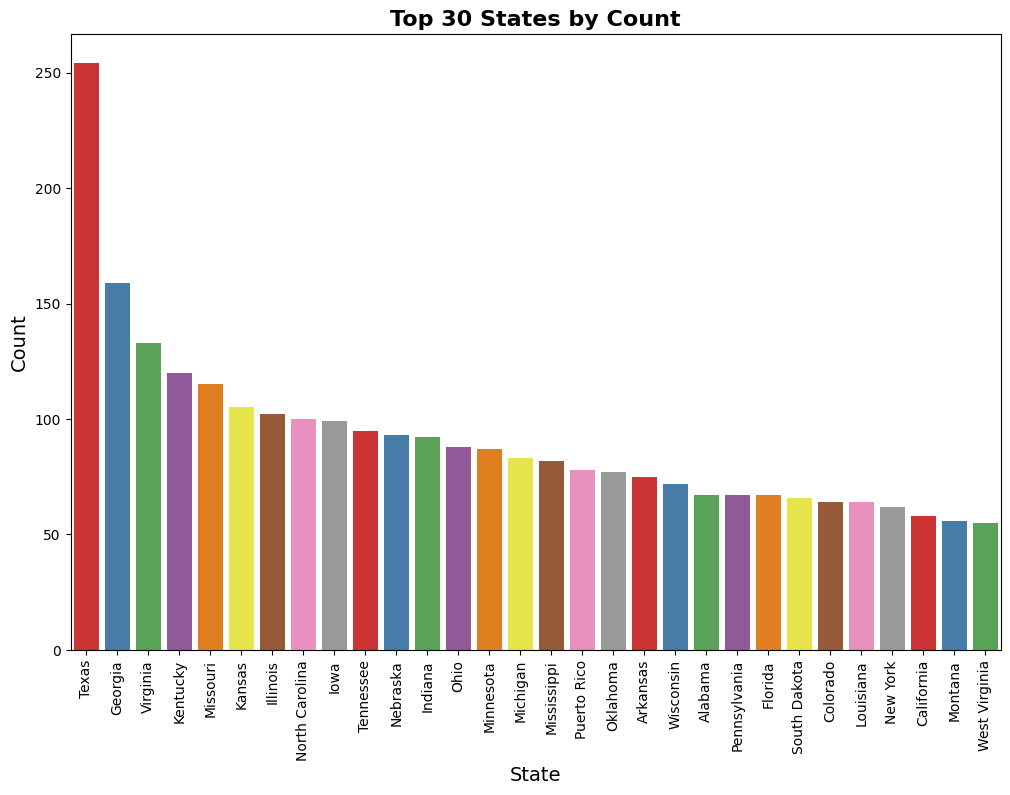

In [89]:
top_30_countries = df['State'].value_counts().nlargest(30).index

df_top_30 = df[df['State'].isin(top_30_countries)]

plt.figure(figsize=(12, 8))
sns.countplot(x='State', data=df_top_30, palette='Set1', order=top_30_countries)
plt.title("Top 30 States by Count", fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()


Observation :-

The countplot shows the distribution of the top 30 states based on their count in the dataset. It highlights the frequency of each state, with the bars colored using the "Set1" palette. This helps to identify which states are most represented in the data.

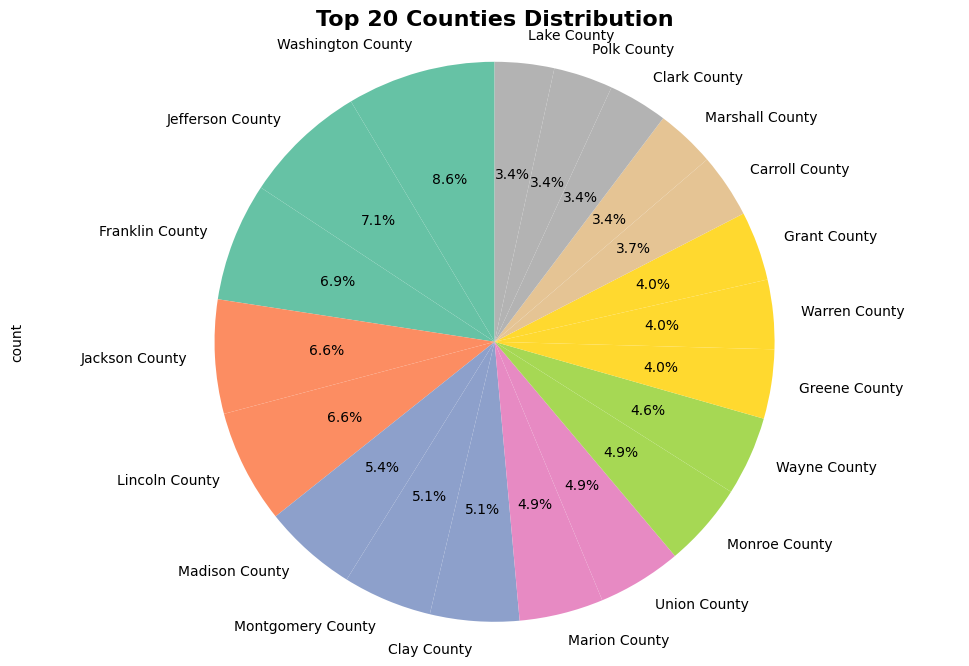

In [165]:
top_20_Counties_counts = df['County'].value_counts().nlargest(20)

plt.figure(figsize=(12, 8))
top_20_Counties_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set2', legend=False)
plt.title("Top 20 Counties Distribution", fontsize=16, fontweight='bold')
plt.axis('equal') 
plt.show()


Observation :- 

The pie chart shows the distribution of the top 20 counties by count. Each slice represents the proportion of each county, with the chart using the "Set2" color palette for clear distinction. It helps to visually understand the share of the most frequent counties in the dataset.

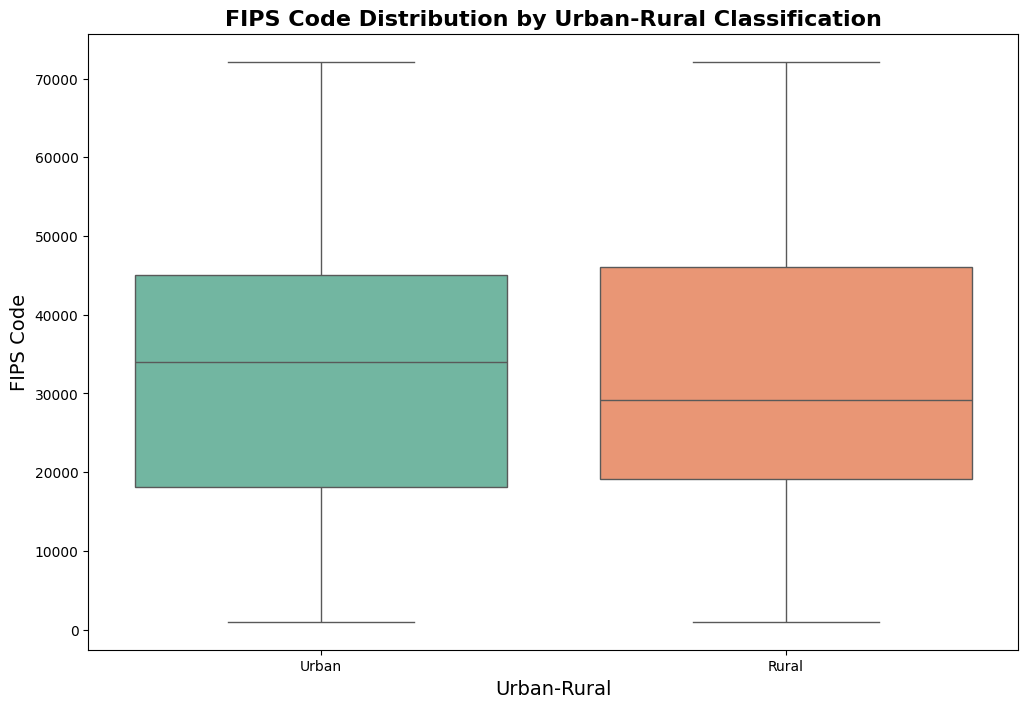

In [216]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Urban-Rural', y='FIPS', data=df, palette="Set2")
plt.title("FIPS Code Distribution by Urban-Rural Classification", fontsize=16, fontweight='bold')
plt.xlabel("Urban-Rural", fontsize=14)
plt.ylabel("FIPS Code", fontsize=14)
plt.show()


Observation :- 

The boxplot displays the distribution of FIPS codes for urban and rural areas. It shows how the range of FIPS codes varies between the two categories, with urban areas showing a wider spread compared to rural areas.

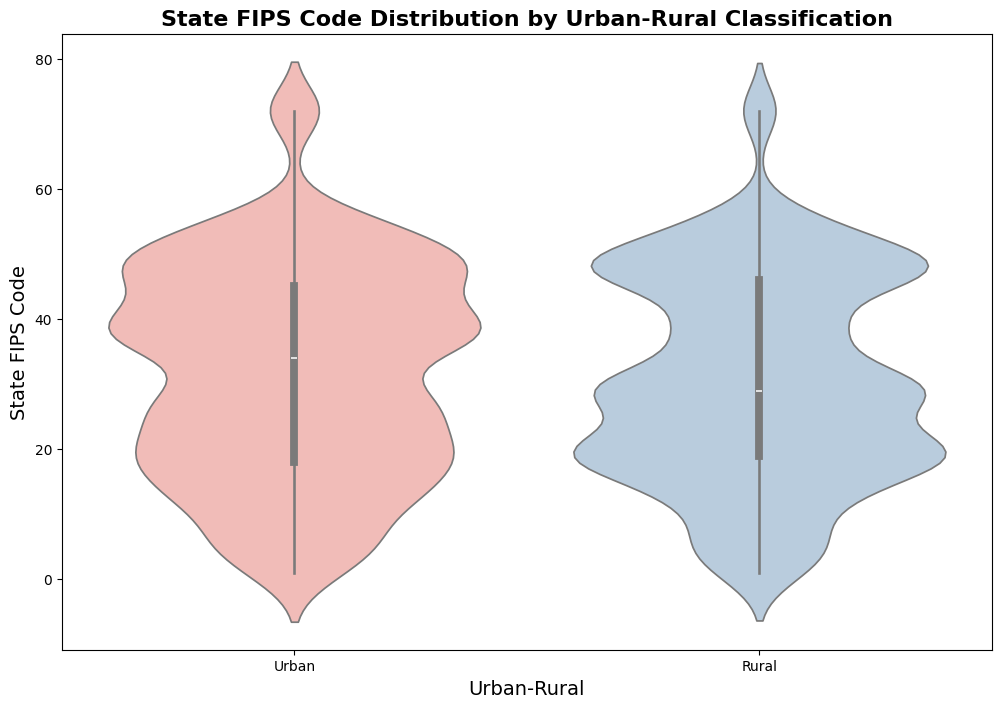

In [213]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Urban-Rural', y='State FIPS Code', data=df, palette="Pastel1")
plt.title("State FIPS Code Distribution by Urban-Rural Classification", fontsize=16, fontweight='bold')
plt.xlabel("Urban-Rural", fontsize=14)
plt.ylabel("State FIPS Code", fontsize=14)
plt.show()


Observation :- 

The violin plot shows the distribution of State FIPS Codes between urban and rural areas. It highlights the spread and concentration of FIPS codes, with urban areas typically showing more variation in FIPS codes compared to rural areas.









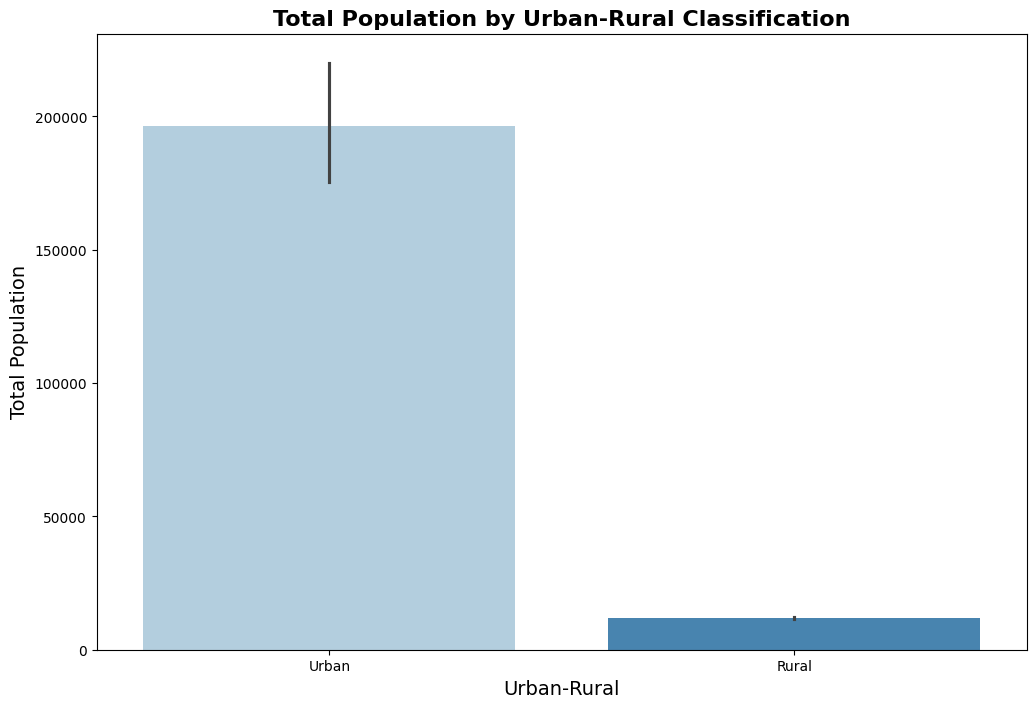

In [212]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Urban-Rural', y='Total Population', data=df, palette="Blues")
plt.title("Total Population by Urban-Rural Classification", fontsize=16, fontweight='bold')
plt.xlabel("Urban-Rural", fontsize=14)
plt.ylabel("Total Population", fontsize=14)
plt.show()


Obervation :-

The bar chart shows the total population distribution between urban and rural areas. Urban areas generally have a significantly larger total population compared to rural areas. The color gradient highlights the differences between the two.

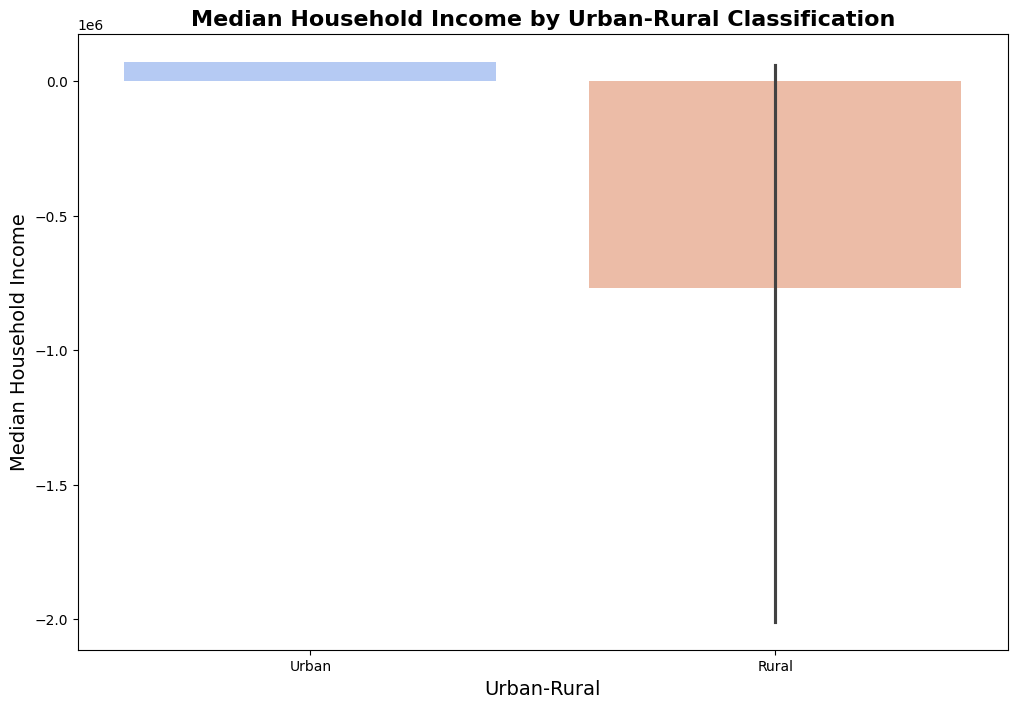

In [210]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Urban-Rural', y='Median Household Income', data=df, palette="coolwarm")
plt.title("Median Household Income by Urban-Rural Classification", fontsize=16, fontweight='bold')
plt.xlabel("Urban-Rural", fontsize=14)
plt.ylabel("Median Household Income", fontsize=14)
plt.show()


Observation :- 


The bar chart compares the median household income between urban and rural areas. It shows that urban areas generally have higher median incomes than rural areas. The color gradient highlights this income difference.

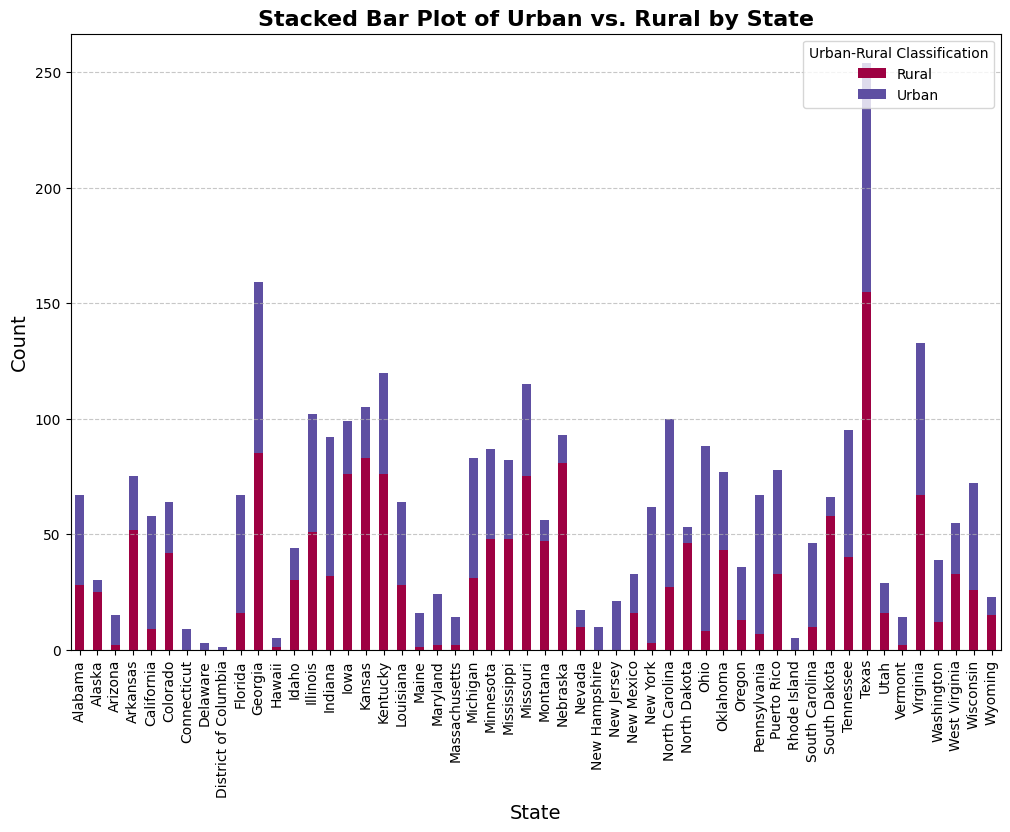

In [157]:
stacked_data = df.pivot_table(index='Urban-Rural', columns='State', aggfunc='size', fill_value=0)

# Plot the stacked bar chart
stacked_data.T.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Spectral')  
plt.title('Stacked Bar Plot of Urban vs. Rural by State', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Urban-Rural Classification', loc='upper right')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observation :- 

The stacked bar chart compares the urban and rural population distribution across states. Each bar represents a state, with segments showing the count of urban and rural areas. The chart helps to easily compare the urban-rural split by state.

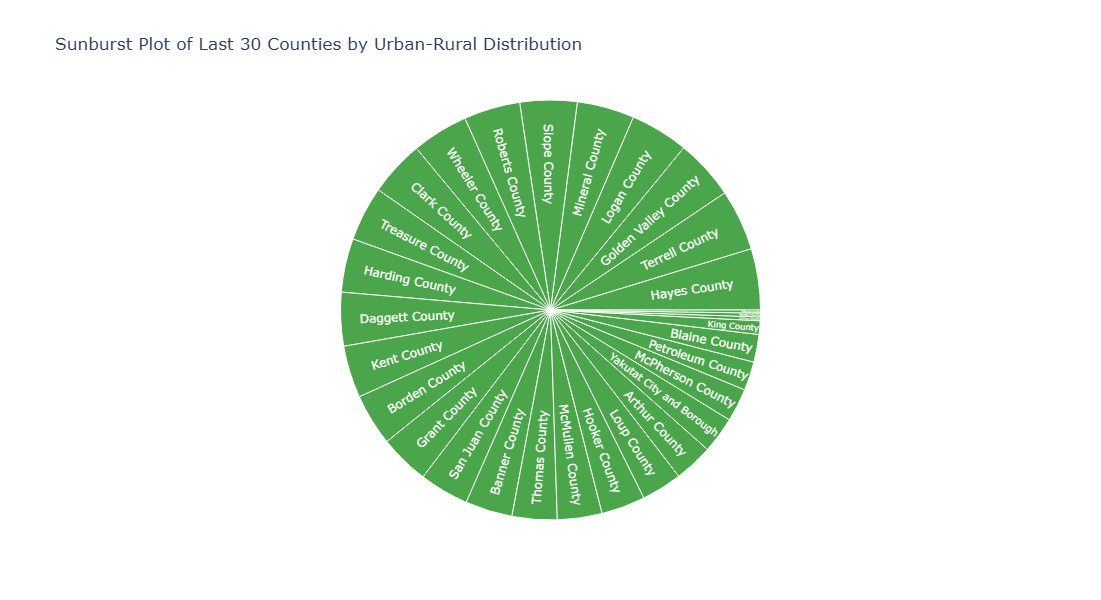

In [211]:
# Filter the dataframe to include only the bottom 30 counties based on total population
bottom_30_counties = df.nsmallest(30, 'Total Population')

# Generate the sunburst plot
fig = px.sunburst(bottom_40_counties, 
                  path=['County'],  # Hierarchical structure
                  values='Total Population',  # Values based on total population
                  color='Urban-Rural',  # Color based on 'Urban-Rural' categories
                  color_discrete_map={'Urban': 'blue', 'Rural': 'green'},  # Discrete color map (for categorical color)
                  title="Sunburst Plot of Last 30 Counties by Urban-Rural Distribution")

# Update layout to set figure size
fig.update_layout(width=1000, height=600)

# Show the plot
fig.show()

Observation :- 

The sunburst plot shows the distribution of total population across the bottom 30 counties, divided by urban and rural areas. Blue represents urban counties, while green represents rural counties. It helps to visualize the population spread in smaller counties.

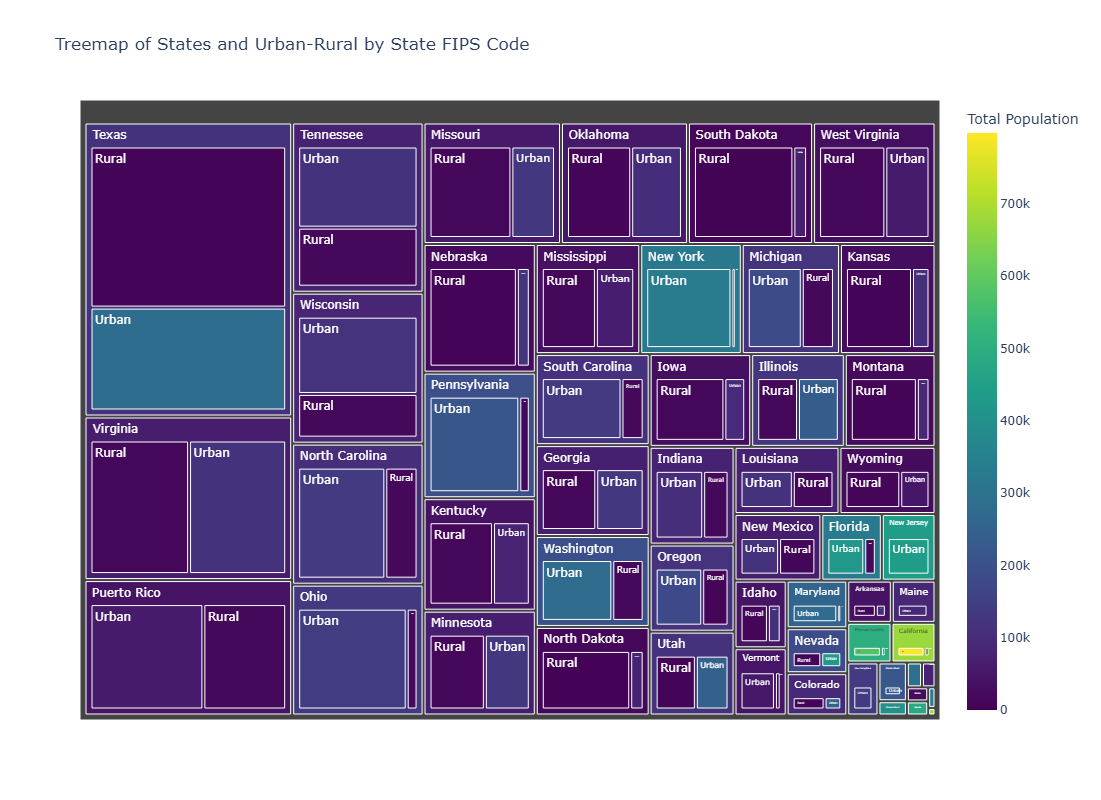

In [183]:
fig = px.treemap(df, 
                 path=['State', 'Urban-Rural'],  # Hierarchical structure
                 values='State FIPS Code',  # Values based on total population
                 color='Total Population',  # Color based on population size
                 color_continuous_scale='Viridis',  # Colormap
                 title="Treemap of States and Urban-Rural by State FIPS Code")

# Update layout to set figure size
fig.update_layout(width=1100, height=800)

# Show the plot
fig.show()

Observation :- 

The treemap visualizes the distribution of states and urban-rural areas based on the State FIPS Code. The size of each block represents the FIPS Code, and the color intensity indicates the total population, with darker shades showing larger populations. It helps to compare states and their urban-rural makeup.

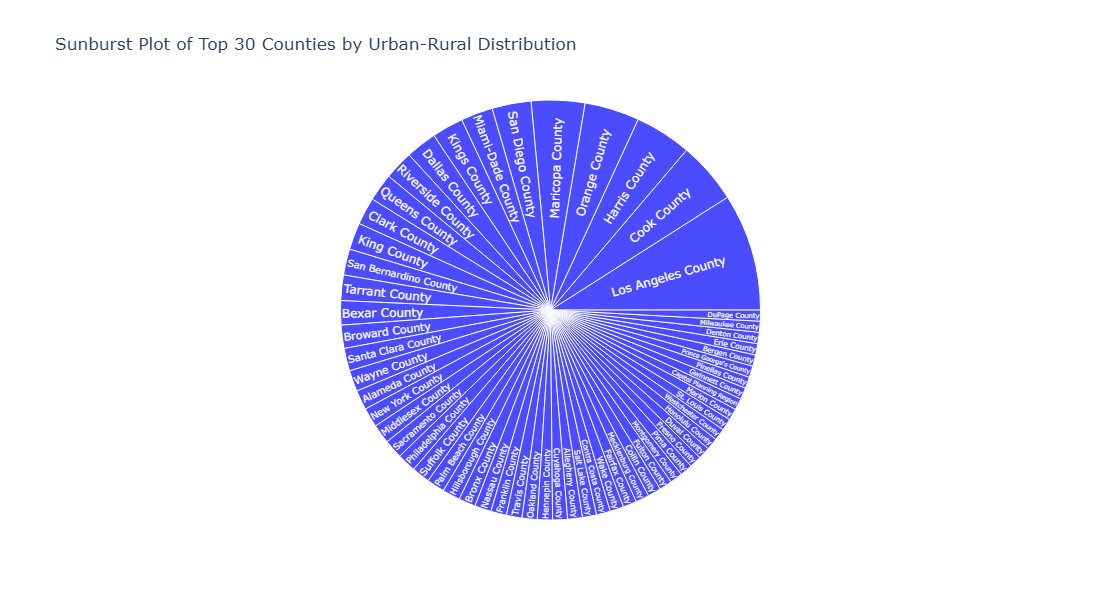

In [193]:
# Filter the dataframe to include only the top 30 counties based on total population
top_30_counties = df.nlargest(60, 'Total Population')

# Generate the sunburst plot
fig = px.sunburst(top_30_counties, 
                  path=['County'],  # Hierarchical structure
                  values='Total Population',  # Values based on total population
                  color='Urban-Rural',  # Color based on 'Urban-Rural' categories
                  color_discrete_map={'Urban': 'blue', 'Rural': 'green'},  # Discrete color map (for categorical color)
                  title="Sunburst Plot of Top 30 Counties by Urban-Rural Distribution")

# Update layout to set figure size
fig.update_layout(width=1000, height=600)

# Show the plot
fig.show()

Observation :- 

The sunburst plot shows the distribution of total population across the top 30 counties, with a breakdown by urban and rural areas. Urban counties are colored blue, while rural counties are colored green. It provides a clear view of how the population is spread between urban and rural areas in these counties.

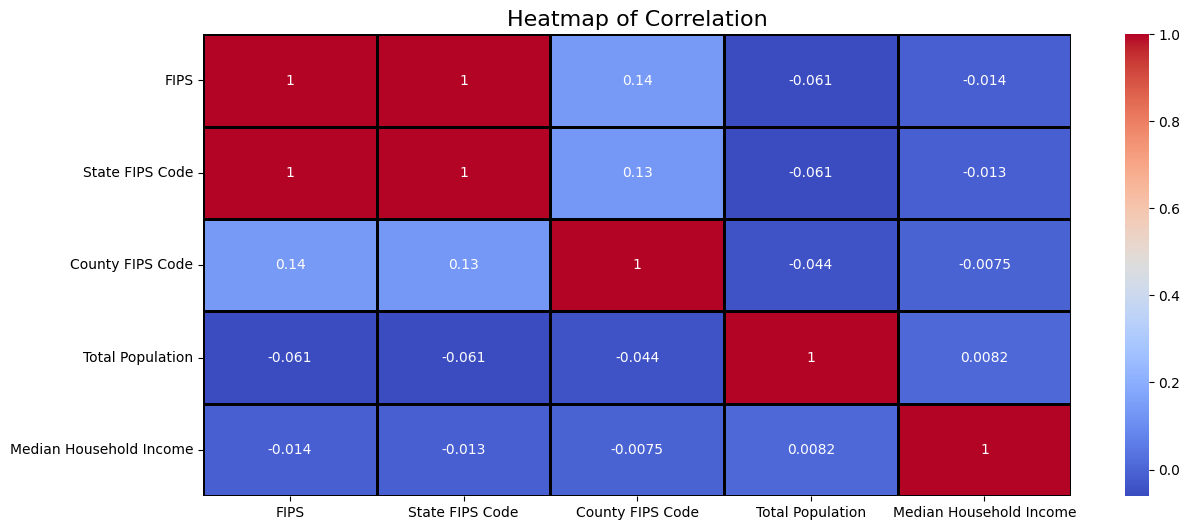

In [209]:
# Filter only numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(numeric_data.corr(), annot=True, linewidths=2, linecolor='k', cmap='coolwarm')  # Change 'coolwarm' to any desired colormap
plt.title('Heatmap of Correlation', fontsize=16)
plt.show()

Observation :- 


The heatmap displays the correlation between numeric variables in the dataset. Stronger correlations are highlighted with warmer colors, while weaker correlations are shown in cooler colors. It provides a quick overview of how the variables relate to each other.